<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/Cars_improvement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used car's price prediction

## Описание задачи

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?!  
Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!

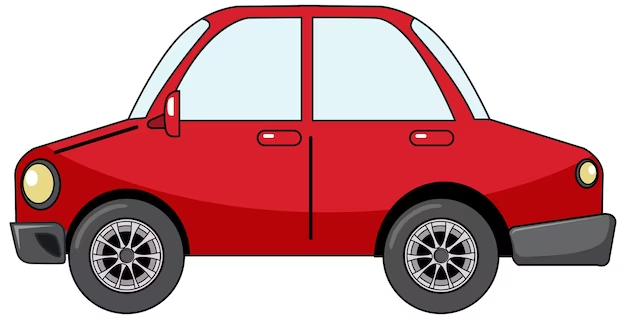

## Импорт библиотек, константы и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
RANDOM_STATE = 42

Будем работать с данными `cars_train.csv`.

Когда финальная модель будет готова, с помощью нее предскажем цены на машины из файла `cars_test.csv` (там ответов нет).

In [ ]:
!wget -O train.csv https://www.dropbox.com/s/qk4b79i7c078sxm/cars_train.csv
!wget -O test.csv https://www.dropbox.com/s/asf4b1z1yme5o7u/cars_test.csv

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.shape

(396212, 15)

Выделим целевую переменную `sellingprice` в отдельную переменную `y`, а `X` - матрица объект-признак.

In [ ]:
X = data.drop('sellingprice', axis=1)
y = data['sellingprice']

**Описание данных**

**_Признаки_**
- `year` - год производства
- `make` - производитель
- `model` - модель
- `trim` - модификация
- `body` - тип кузова
- `transmission` - тип КПП
- `vin` - идентификатор (вин)
- `state` - штат регистрации
- `condition` - состояние по шкале (1-5)
- `odometer` - пробег в милях
- `color` - цвет кузова
- `interior` - цвет интерьера
- `seller` - продавец
- `saledate` - дата продажи

**_Целевой признак_**
- `sellingprice` - стоимость продажи

In [ ]:
X.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2013,Dodge,Dart,Limited,Sedan,automatic,1c3cdfca5dd293552,mo,4.6,13957.0,gray,black,chrysler capital,Wed Jan 21 2015 02:30:00 GMT-0800 (PST)
1,2014,Honda,Civic,LX,Sedan,automatic,19xfb2f56ee228781,ca,5.0,2401.0,gray,black,"ahfc/honda lease trust/hvt, inc.",Thu Feb 26 2015 04:00:00 GMT-0800 (PST)
2,2012,Chevrolet,Traverse,LT,suv,automatic,1gnkrged3cj244704,wi,2.4,70046.0,white,black,capital one auto finance,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
3,2014,Nissan,Versa Note,1.6 SV,Hatchback,automatic,3n1ce2cp9el407766,fl,2.6,23415.0,gray,black,florida auto financial group,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
4,2014,Nissan,Versa,1.6 SV,sedan,automatic,3n1cn7ap4el813308,il,3.4,17040.0,blue,black,nissan motor acceptance corporation,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)


Посмотрим на типы колонок и число пропущенных значений в них.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396212 entries, 0 to 396211
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          396212 non-null  int64  
 1   make          388993 non-null  object 
 2   model         388922 non-null  object 
 3   trim          388727 non-null  object 
 4   body          386883 non-null  object 
 5   transmission  350025 non-null  object 
 6   vin           396212 non-null  object 
 7   state         396212 non-null  object 
 8   condition     387759 non-null  float64
 9   odometer      396151 non-null  float64
 10  color         395679 non-null  object 
 11  interior      395679 non-null  object 
 12  seller        396212 non-null  object 
 13  saledate      396212 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 42.3+ MB


Посмотрим на числовые признаки

In [ ]:
X.describe()

,year,condition,odometer
count,396212.000000,387759.000000,396151.000000
mean,2010.041442,3.425687,68336.479029
std,3.977384,0.949871,53559.280598
min,1982.000000,1.000000,1.000000
25%,2007.000000,2.700000,28259.000000
50%,2012.000000,3.600000,52113.000000
75%,2013.000000,4.200000,99300.000000
max,2015.000000,5.000000,999999.000000


Посмотрим на категориальные признаки

In [ ]:
X.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,388993,388922,388727,386883,350025,396212,396212,395679,395679,396212,396212
unique,91,949,1899,83,2,396212,38,20,17,12530,3544
top,Ford,Altima,Base,Sedan,automatic,1c3cdfca5dd293552,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,66391,13969,39538,141921,337646,1,59164,78576,173230,14323,3783


Признак `vin` это уникальный идентификатор машины, поэтому удалим его.

In [ ]:
X.drop('vin', axis=1, inplace=True)

## Разведочный анализ данных

### Заполнение пропусков

Заполним пропуски в числовых столбцах средним значением, а в категориальных - пустой категорией

In [ ]:
for c in X.columns:
    if X[c].dtype == 'object':
          X[c].fillna("", inplace=True)

In [ ]:
for c in X.columns:
    if X[c].dtype != 'object':
          mean = np.mean(X[c])
          X[c].fillna(mean, inplace=True)

### Обработка категориальных признаков - 1

Посмотрим на количество значений в каждой категории

In [ ]:
for c in X.columns:
    if X[c].dtype == 'object':
          print(c, len(X[c].unique()))

make 92
model 950
trim 1900
body 84
transmission 3
state 38
color 21
interior 18
seller 12530
saledate 3544


В `saledate` очень много различных значений. Посмотрим почему.

In [ ]:
X[['year','saledate']]

,year,saledate
0,2013,Wed Jan 21 2015 02:30:00 GMT-0800 (PST)
1,2014,Thu Feb 26 2015 04:00:00 GMT-0800 (PST)
2,2012,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
3,2014,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
4,2014,Thu Jun 04 2015 03:00:00 GMT-0700 (PDT)
...,...,...
396207,2013,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
396208,2009,Mon Jun 08 2015 02:00:00 GMT-0700 (PDT)
396209,2004,Tue Jan 20 2015 02:30:00 GMT-0800 (PST)
396210,2013,Fri Dec 19 2014 11:45:00 GMT-0800 (PST)


Обработаем `saledate`:
* сделаем признак `car_age` - возраст машины в годах
* сделаем признак date - месяц+год продажи машины (категориальный)

Исходный признак `saledate` удалим

In [ ]:
X['car_age'] = X['saledate'].apply(lambda x: int(x.split(" ")[3])) - X['year']
X['date'] = X['saledate'].apply(lambda x: x.split(" ")[1]+x.split(" ")[3])

X.drop('saledate', axis=1, inplace=True)

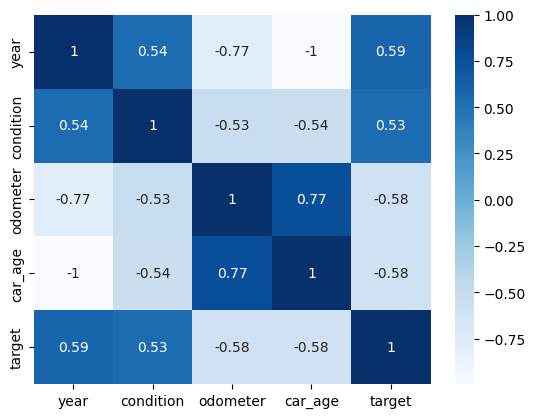

In [ ]:
import seaborn as sb

X['target'] = y

cols = X.columns[X.dtypes != 'object']

corr = X[cols].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

X.drop('target', axis=1, inplace=True)

Все числовые признаки важны, запомним это

Посмотрим на аналог корреляции категориальных признаков

In [ ]:
!pip install association-metrics

In [ ]:
import association_metrics as am

XC = X.apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(XC)

cramersv.fit()

,make,model,trim,body,transmission,state,color,interior,seller,date
make,1.000000,0.942073,0.768825,0.189035,0.161258,0.080016,0.085875,0.108237,0.405386,0.059136
model,0.942073,1.000000,0.552843,0.615147,0.310298,0.120689,0.145266,0.181734,0.287182,0.086036
trim,0.768825,0.552843,1.000000,0.437450,0.291284,0.131441,0.139243,0.210486,0.267798,0.099165
body,0.189035,0.615147,0.437450,1.000000,0.171188,0.054380,0.070882,0.073898,0.251710,0.298083
transmission,0.161258,0.310298,0.291284,0.171188,1.000000,0.377115,0.063472,0.066053,0.394181,0.031898
state,0.080016,0.120689,0.131441,0.054380,0.377115,1.000000,0.064536,0.062192,0.679166,0.081021
color,0.085875,0.145266,0.139243,0.070882,0.063472,0.064536,1.000000,0.259053,0.233966,0.018536
interior,0.108237,0.181734,0.210486,0.073898,0.066053,0.062192,0.259053,1.000000,0.258849,0.061795
seller,0.405386,0.287182,0.267798,0.251710,0.394181,0.679166,0.233966,0.258849,1.000000,0.286704
date,0.059136,0.086036,0.099165,0.298083,0.031898,0.081021,0.018536,0.061795,0.286704,1.000000


Признаки make и model сильно связаны, поэтому уберем make как менее информативный

In [ ]:
X.drop('make', axis=1, inplace=True)

Как посмотреть влияние категориального признака на целевую переменную? Здесь лучше всего поможет scatterplot

<Axes: ylabel='sellingprice'>

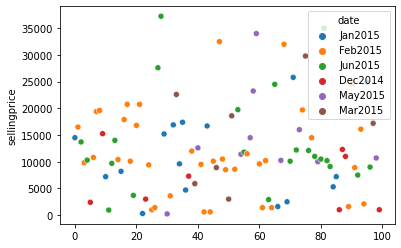

In [ ]:
import seaborn as sns

sns.scatterplot(data=X.iloc[:100], x=X.iloc[:100].index, y=y[:100], hue='date');

<Axes: ylabel='sellingprice'>

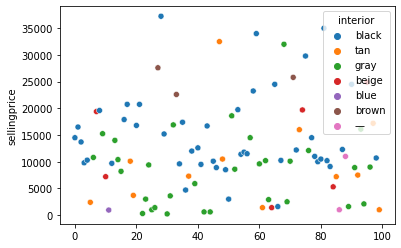

In [ ]:
sns.scatterplot(data=X.iloc[:100], x=X.iloc[:100].index, y=y[:100], hue='interior');

<Axes: ylabel='sellingprice'>

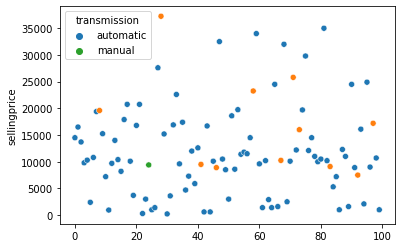

In [ ]:
sns.scatterplot(data=X.iloc[:100], x=X.iloc[:100].index, y=y[:100], hue='transmission');

Посмотрим на распределение целевой переменной

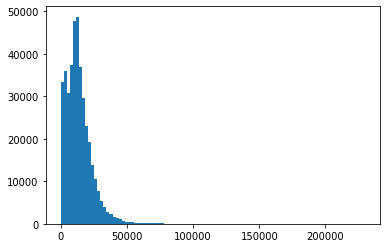

In [ ]:
plt.hist(y, bins=100);

Пока мы не будем ничего делать с этим распределением, но известно, что с распределениями, отличными от нормального, большинству моделей сложно работать.

Поэтому при улучшении качества базового решения мы преобразуем это распределение.

### Поиск аномальных значений

In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[X.dtypes != 'object']

year


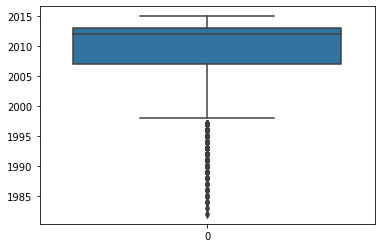

condition


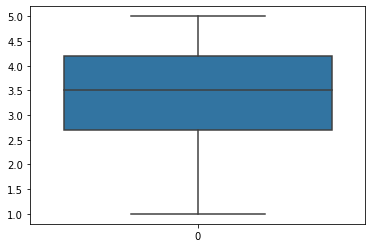

odometer


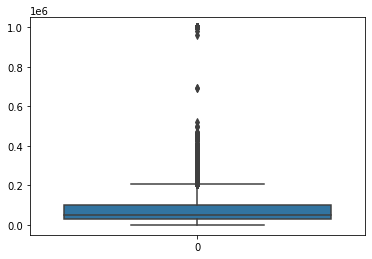

car_age


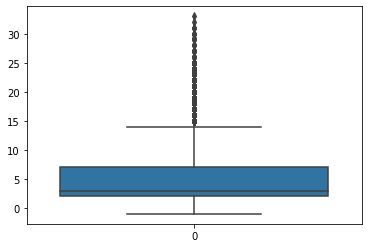

In [ ]:
for col in num_cols:
    print(col)
    sb.boxplot(X[col])
    plt.show()

In [ ]:
X[X['odometer'] > 800000][['car_age','odometer']]

,car_age,odometer
8651,8,999999.0
26775,8,999999.0
39643,8,999999.0
59125,8,999999.0
69969,9,999999.0
70028,10,999999.0
78649,9,999999.0
90539,14,999999.0
94884,2,999999.0
105833,8,999999.0


Выкинем машины младше 10 лет, проехавшие 1_000_000 миль - это почти точно выбросы.

In [ ]:
Xnew = X[~((X.car_age < 10) & (X.odometer > 800_000))]
ynew = y[~((X.car_age < 10) & (X.odometer > 800_000))]

Xnew.drop('car_age', axis=1, inplace=True)

## Построение baseline

Для baseline-модели мы сделаем следующее:
* закодируем категориальные признаки при помощи TargetEncoder
* масштабируем все признаки с помощью StandardScaler
* обучим линейную регрессию

In [ ]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.9 MB/s eta 0:00:00


In [ ]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

Разобъем данные на тренировочную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.25, random_state=42)

Осуществим задуманные шаги

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


enc = TargetEncoder(cols=cat_cols)

enc.fit(X_train, y_train)
X_train_new = enc.transform(X_train)
X_test_new = enc.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = pd.DataFrame(scaler.transform(X_train_new), columns=X_train.columns)
X_test_new = pd.DataFrame(scaler.transform(X_test_new), columns=X_test.columns)

model = LinearRegression()
model.fit(X_train_new, y_train)
pred = model.predict(X_test_new)

Оценим качество полученной модели

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

MAPE(y_test, pred)

0.7151865211267131

Ошибка в среднем 71% от цены - модель пока не очень хорошая, есть куда улучшать!

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

p1 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

In [ ]:
p1.fit(X_train, y_train)

Pipeline(steps=[('encoder_',
                 TargetEncoder(cols=Index(['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior',
       'seller', 'date'],
      dtype='object'))),
                ('scaler_', StandardScaler()), ('model_', LinearRegression())])

In [ ]:
pred = p1.predict(X_test)

MAPE(y_test, pred)

0.7151865211267131

## Первые улучшения

В нашем пайплайне три шага:
* закодируем категориальные признаки при помощи TargetEncoder
* масштабируем все признаки с помощью StandardScaler
* обучим линейную регрессию

Как можно улучшить решение?

1) Можно подобрать гиперпараметры кодировщика в шаге 1, а также сам кодировщик

2) Можно использовать другой способ масштабирования данных

3) Можно использовать другую модель!

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# по умолчанию smoothing = 10

p2 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p3 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=100)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p4 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p5 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=10)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p6 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=100)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p7 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p8 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

In [ ]:
for i,p in enumerate([p1,p2,p3,p4,p5,p6,p7,p8]):
    p.fit(X_train, y_train)
    pred = p.predict(X_test)
    print(i+1, MAPE(y_test, pred))

1 0.7152231848952257
2 0.7207315520473909
3 0.7248667182222321
4 0.7207315520473866
5 0.715223184895222
6 0.724866718222228


Значительных улучшений нет.

Сменим теперь модель!

In [ ]:
p9 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p9.fit(X_train, y_train)
pred = p7.predict(X_test)
MAPE(y_test, pred)

0.21529274611833898

Уже гораздо лучше. Попробуем для RandomForest поменять кодировщик, его гиперпараметры и скалер.

In [ ]:
p10 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p11 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p12 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p13 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

In [ ]:
for i,p in enumerate([p9,p10,p11,p12,p13]):
    p.fit(X_train.iloc[:50000], y_train[:50000])
    pred = p.predict(X_test)
    print(i+7, MAPE(y_test, pred))

7 0.30891758426909377
8 1.9487382213229956
9 0.3457712450469701
10 1.9484529200782645
11 0.3311061588045949


Заново обучим лучшую на данный момент модель (p9) и посмотрим на важность признаков

In [ ]:
p9.fit(X_train, y_train)
pred = p9.predict(X_test)
MAPE(y_test, pred)

0.21580798600753276

In [ ]:
weights = pd.DataFrame(p9['model_'].feature_importances_, index=X_train.columns)
weights

,0
year,0.078367
model,0.404954
trim,0.067346
body,0.023164
transmission,0.001785
state,0.005375
condition,0.018208
odometer,0.343062
color,0.004295
interior,0.004430


## Попытки улучшить модель

### Шаг 1

In [ ]:
plt.hist(y, bins=100);

Попробуем сделать распределение целевой переменной более похожим на нормальное и заново обучить лучшую модель с предыдущего шага.

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
p9 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p9.fit(X_train, y_train)
pred_p9 = p9.predict(X_test)
MAPE(np.exp(y_test), np.exp(pred_p9))

In [ ]:
MAPE(np.exp(y_test), np.exp(pred_p9))

0.18452835461221626

Качество модели возросло!

### Шаг 2

Подберем оптимальные параметры леса при помощи Optuna

In [ ]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.1 MB/s eta 0:00:00


In [ ]:
data_pipeline = Pipeline([
        ('encoder_',TargetEncoder(cols=cat_cols)),
        ('scaler_', StandardScaler())
])

X_train_good = data_pipeline.fit_transform(X_train, y_train)
X_test_good = data_pipeline.transform(X_test)

In [ ]:
import optuna

def objective(trial):

    param = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "max_features": trial.suggest_float("max_features", 0.1, 1.)
    }

    estimator = RandomForestRegressor(**param, verbose=False, n_jobs=-1)

    estimator.fit(X_train_good[:50000], y_train.iloc[:50000])
    pred = estimator.predict(X_test_good)

    return MAPE(y_test, pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15)
print(study.best_trial)

## Улучшаем модель дальше

Лучшая модель с предыдущего шага - RandomForest (MAPE = 0.178)

Попробуем CatBoost!

In [ ]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()

model.fit(X_train_good, y_train)
pred = model.predict(X_test_good)

MAPE(np.exp(y_test), np.exp(pred))

Learning rate set to 0.100672
0:	learn: 0.8540169	total: 124ms	remaining: 2m 4s
1:	learn: 0.7942785	total: 292ms	remaining: 2m 25s
2:	learn: 0.7401870	total: 440ms	remaining: 2m 26s
3:	learn: 0.6927492	total: 583ms	remaining: 2m 25s
4:	learn: 0.6506373	total: 714ms	remaining: 2m 22s
5:	learn: 0.6140237	total: 815ms	remaining: 2m 14s
6:	learn: 0.5820326	total: 933ms	remaining: 2m 12s
7:	learn: 0.5527775	total: 1.01s	remaining: 2m 5s
8:	learn: 0.5273501	total: 1.12s	remaining: 2m 3s
9:	learn: 0.5046264	total: 1.21s	remaining: 2m
10:	learn: 0.4849635	total: 1.33s	remaining: 1m 59s
11:	learn: 0.4673753	total: 1.5s	remaining: 2m 3s
12:	learn: 0.4520332	total: 1.6s	remaining: 2m 1s
13:	learn: 0.4387389	total: 1.69s	remaining: 1m 58s
14:	learn: 0.4273062	total: 1.77s	remaining: 1m 56s
15:	learn: 0.4168758	total: 1.87s	remaining: 1m 54s
16:	learn: 0.4077701	total: 1.92s	remaining: 1m 50s
17:	learn: 0.3999513	total: 2.01s	remaining: 1m 49s
18:	learn: 0.3928886	total: 2.09s	remaining: 1m 48s
19:

0.18851937358986648

Подберем гиперпараметры catboost

In [ ]:
import optuna

def objective(trial):

    param = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 16),
    }

    estimator = CatBoostRegressor(**param, verbose=False)

    estimator.fit(X_train_good[:50000], y_train.iloc[:50000])
    pred = estimator.predict(X_test_good)

    return MAPE(np.exp(y_test), np.exp(pred))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15)
print(study.best_trial)

[I 2023-03-30 14:09:05,533] A new study created in memory with name: no-name-b1221cbd-f94c-41c3-9b73-7e885610ef9a
[I 2023-03-30 14:09:11,654] Trial 0 finished with value: 0.207093891995945 and parameters: {'n_estimators': 852, 'max_depth': 6}. Best is trial 0 with value: 0.207093891995945.
[I 2023-03-30 14:09:15,917] Trial 1 finished with value: 0.21776714340231282 and parameters: {'n_estimators': 618, 'max_depth': 4}. Best is trial 0 with value: 0.207093891995945.
[I 2023-03-30 14:09:16,537] Trial 2 finished with value: 0.2988453702692233 and parameters: {'n_estimators': 10, 'max_depth': 6}. Best is trial 0 with value: 0.207093891995945.
[I 2023-03-30 14:09:23,353] Trial 3 finished with value: 0.20332925690095788 and parameters: {'n_estimators': 638, 'max_depth': 8}. Best is trial 3 with value: 0.20332925690095788.
[I 2023-03-30 14:09:26,456] Trial 4 finished with value: 0.19971643532210667 and parameters: {'n_estimators': 209, 'max_depth': 9}. Best is trial 4 with value: 0.1997164353

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.18985532765010196], datetime_start=datetime.datetime(2023, 3, 30, 14, 16, 3, 226270), datetime_complete=datetime.datetime(2023, 3, 30, 14, 16, 23, 80557), params={'n_estimators': 477, 'max_depth': 11}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=10, step=1), 'max_depth': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=13, value=None)


In [ ]:
model = CatBoostRegressor(n_estimators=477, max_depth=11)

model.fit(X_train_good, y_train)
pred_cb = model.predict(X_test_good)

MAPE(np.exp(y_test), np.exp(pred_cb))

Learning rate set to 0.183769
0:	learn: 0.7899825	total: 200ms	remaining: 1m 35s
1:	learn: 0.6832326	total: 349ms	remaining: 1m 22s
2:	learn: 0.5997472	total: 488ms	remaining: 1m 17s
3:	learn: 0.5350876	total: 618ms	remaining: 1m 13s
4:	learn: 0.4845264	total: 751ms	remaining: 1m 10s
5:	learn: 0.4453096	total: 877ms	remaining: 1m 8s
6:	learn: 0.4162230	total: 1.01s	remaining: 1m 8s
7:	learn: 0.3936800	total: 1.14s	remaining: 1m 6s
8:	learn: 0.3766028	total: 1.28s	remaining: 1m 6s
9:	learn: 0.3630786	total: 1.41s	remaining: 1m 5s
10:	learn: 0.3533589	total: 1.53s	remaining: 1m 4s
11:	learn: 0.3446474	total: 1.66s	remaining: 1m 4s
12:	learn: 0.3376677	total: 1.8s	remaining: 1m 4s
13:	learn: 0.3322356	total: 1.93s	remaining: 1m 3s
14:	learn: 0.3277302	total: 2.06s	remaining: 1m 3s
15:	learn: 0.3244077	total: 2.21s	remaining: 1m 3s
16:	learn: 0.3217219	total: 2.35s	remaining: 1m 3s
17:	learn: 0.3194727	total: 2.49s	remaining: 1m 3s
18:	learn: 0.3173098	total: 2.62s	remaining: 1m 3s
19:	lea

0.17039958909106245

Теперь пусть CatBoost сам кодирует признаки!

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297137 entries, 82213 to 121967
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          297137 non-null  int64  
 1   model         297137 non-null  object 
 2   trim          297137 non-null  object 
 3   body          297137 non-null  object 
 4   transmission  297137 non-null  object 
 5   state         297137 non-null  object 
 6   condition     297137 non-null  float64
 7   odometer      297137 non-null  float64
 8   color         297137 non-null  object 
 9   interior      297137 non-null  object 
 10  seller        297137 non-null  object 
 11  date          297137 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 29.5+ MB


In [ ]:
cat_features = [1,2,3,4,5,8,9,10,11]

In [ ]:
model = CatBoostRegressor(cat_features=cat_features)

model.fit(X_train, y_train)
pred = model.predict(X_test)

MAPE(np.exp(y_test), np.exp(pred))

Learning rate set to 0.100672
0:	learn: 0.8565483	total: 441ms	remaining: 7m 20s
1:	learn: 0.7972888	total: 893ms	remaining: 7m 25s
2:	learn: 0.7441473	total: 1.37s	remaining: 7m 35s
3:	learn: 0.6957480	total: 1.8s	remaining: 7m 27s
4:	learn: 0.6514757	total: 2.19s	remaining: 7m 15s
5:	learn: 0.6130233	total: 2.59s	remaining: 7m 8s
6:	learn: 0.5801864	total: 2.94s	remaining: 6m 57s
7:	learn: 0.5511075	total: 3.36s	remaining: 6m 56s
8:	learn: 0.5213029	total: 3.83s	remaining: 7m 1s
9:	learn: 0.4985436	total: 4.16s	remaining: 6m 52s
10:	learn: 0.4777652	total: 4.46s	remaining: 6m 40s
11:	learn: 0.4605210	total: 4.8s	remaining: 6m 35s
12:	learn: 0.4422734	total: 5.23s	remaining: 6m 37s
13:	learn: 0.4275537	total: 5.61s	remaining: 6m 35s
14:	learn: 0.4156051	total: 6.04s	remaining: 6m 36s
15:	learn: 0.4032171	total: 6.42s	remaining: 6m 34s
16:	learn: 0.3946539	total: 6.81s	remaining: 6m 34s
17:	learn: 0.3870855	total: 7.35s	remaining: 6m 41s
18:	learn: 0.3799812	total: 8.06s	remaining: 6m 

0.1766529865352466

## Stacking и Blending

### Простое смешивание

* RandomForest - 0.178
* CatBoost - 0.170

In [ ]:
pred_final = 0.3 * pred_p9 + 0.7 * pred_cb

MAPE(np.exp(y_test), np.exp(pred_final))

0.16798979823334326

### Stacking (и blending)


In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('cb', CatBoostRegressor(n_estimators=477, max_depth=11))
    ]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

In [ ]:
reg.fit(X_train_good, y_train)
pred_stacking = reg.predict(X_test_good)

MAPE(np.exp(y_test), np.exp(pred_stacking))

Learning rate set to 0.183769
0:	learn: 0.7899825	total: 139ms	remaining: 1m 6s
1:	learn: 0.6832326	total: 275ms	remaining: 1m 5s
2:	learn: 0.5997472	total: 402ms	remaining: 1m 3s
3:	learn: 0.5350876	total: 538ms	remaining: 1m 3s
4:	learn: 0.4845264	total: 667ms	remaining: 1m 2s
5:	learn: 0.4453096	total: 807ms	remaining: 1m 3s
6:	learn: 0.4162230	total: 933ms	remaining: 1m 2s
7:	learn: 0.3936800	total: 1.06s	remaining: 1m 2s
8:	learn: 0.3766028	total: 1.19s	remaining: 1m 1s
9:	learn: 0.3630786	total: 1.32s	remaining: 1m 1s
10:	learn: 0.3533589	total: 1.47s	remaining: 1m 2s
11:	learn: 0.3446474	total: 1.6s	remaining: 1m 1s
12:	learn: 0.3376677	total: 1.72s	remaining: 1m 1s
13:	learn: 0.3322356	total: 1.88s	remaining: 1m 2s
14:	learn: 0.3277302	total: 2s	remaining: 1m 1s
15:	learn: 0.3244077	total: 2.13s	remaining: 1m 1s
16:	learn: 0.3217219	total: 2.26s	remaining: 1m 1s
17:	learn: 0.3194727	total: 2.39s	remaining: 1m
18:	learn: 0.3173098	total: 2.51s	remaining: 1m
19:	learn: 0.3154900	

0.18458891589297133

## Сохранение результатов

Что сохраняем?

* Предсказания моделей
* Модели

In [ ]:
test_data = pd.read_csv("test.csv")

test_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2011,Chevrolet,HHR,LT,Wagon,automatic,3gnbabfwxbs592572,ny,2.5,99177.0,silver,gray,credit acceptance corp/vrs/southfield,Thu Feb 26 2015 01:15:00 GMT-0800 (PST)
1,2008,Ford,Econoline Cargo,E-150,Van,automatic,1ftne14w28db27123,mn,2.8,131850.0,white,gray,ari,Thu Jan 22 2015 02:45:00 GMT-0800 (PST)
2,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbbxdn678363,tn,3.9,43643.0,—,gray,enterprise veh exchange/rental,Wed Feb 25 2015 02:30:00 GMT-0800 (PST)
3,2013,Hyundai,Elantra,GLS,Sedan,automatic,5npdh4ae7dh257662,la,3.2,59294.0,white,beige,the hertz corporation,Wed Dec 31 2014 10:00:00 GMT-0800 (PST)
4,2012,Ford,Explorer,Limited,SUV,automatic,1fmhk8f83cga78501,nj,2.5,39311.0,gray,black,"ford motor credit company,llc",Wed Feb 04 2015 01:00:00 GMT-0800 (PST)


Заполняем пропуски

In [ ]:
for c in test_data.columns:
    if test_data[c].dtype == 'object':
          test_data[c].fillna("", inplace=True)

In [ ]:
for c in test_data.columns:
    if test_data[c].dtype != 'object':
          mean = np.mean(X[c])
          test_data[c].fillna(mean, inplace=True)

Обрабатываем дату

In [ ]:
test_data['date'] = test_data['saledate'].apply(lambda x: x.split(" ")[1]+x.split(" ")[3])

Удаляем столбцы

In [ ]:
test_data.drop(['vin','make','saledate'], axis=1, inplace=True)

Преобразуем данные перед применением модели

In [ ]:
test_good = data_pipeline.transform(test_data)

Применяем модель

In [ ]:
test_pred = model.predict(test_good)

Сохраняем предсказания в файл

In [ ]:
test_data['prediction'] = test_pred

test_data[['prediction']].to_csv("test_prediction.csv", index=False)

### Сохраним модель

In [ ]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# а так модель можно загрузить из файла:
with open('filename.pickle', 'rb') as f:
    model = pickle.load(f)